## Set up environment paths

In [1]:
import setup

setup.main()

%load_ext autoreload
%autoreload 2

Working directory:  /Users/facosta/Desktop/code/neurometry/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry
Directory added to path:  /Users/facosta/Desktop/code/neurometry/neurometry


## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import persistent_homology
import plotly.graph_objects as go
import viz

In [443]:
def create_bumps_array(positions, widths, num_angles, equal_peaks=False):
    n_cells = len(positions)
    angles = np.linspace(0, 360, num_angles)
    place_cell_activity = np.zeros((num_angles, n_cells))
    firing_rates = np.zeros((num_angles, n_cells))
    for cell_id in range(n_cells):
        peak_pos = positions[cell_id]
        bump_std = widths[cell_id]
        firing_rate = np.exp(
            -((angles - 180) ** 2) / (2 * bump_std**2)
        )  # Gaussian bump
        if equal_peaks:
            firing_rate = 40 * (firing_rate / np.max(firing_rate))  # normalize to 40 Hz
        else:
            firing_rate = np.random.normal(40, 20) * (
                firing_rate / np.max(firing_rate)
            )  # add some variability
        place_field = np.zeros(num_angles)
        place_field += np.random.poisson(firing_rate)
        place_field = np.roll(place_field, int((peak_pos - 180) * (num_angles / 360)))
        firing_rate = np.roll(firing_rate, int((peak_pos - 180) * (num_angles / 360)))
        firing_rates[:, cell_id] = firing_rate
        place_cell_activity[:, cell_id] = place_field

    radius = np.linalg.norm(firing_rates, axis=1)

    return firing_rates, radius, place_cell_activity, angles

In [489]:
def plot_bumps_array(firing_rates, radius, place_fields, angles):
    n_cells = place_fields.shape[1]

    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel("Lab angles")
    ax1.set_ylabel("Activation")
    ax1.set_title("Place cell firing rate")

    for cell_id in range(n_cells):
        ax1.plot(
            angles, firing_rates[:, cell_id], c=f"C{cell_id}", label=f"Neuron {cell_id}"
        )

    ax1.plot(angles, radius, c="k", label="Radius", linestyle="--", alpha=0.5)

    ax1.legend()

    ax2 = fig.add_subplot(122)
    ax2.set_xlabel("Lab angles")
    ax2.set_ylabel("Neuron #")
    ax2.set_title("Place cell activity")
    im = ax2.imshow(
        place_fields.T,
        cmap="viridis",
        aspect="auto",
        interpolation="none",
        extent=(0, 360, place_fields.shape[1], 0),
    )
    ax2.set_ylabel("Neuron", fontsize=25)
    ax2.set_yticks(np.arange(0.5, place_fields.shape[1]))
    plt.colorbar(im, label="Activation")

    return fig

In [483]:
# positions = np.linspace(0,360,3)
# positions = np.arange(0,360,120)
positions = np.random.uniform(0, 360, 20)
# widths = 30*np.ones_like(positions)
widths = np.random.normal(50, 20, len(positions))
print(positions)
equal_peaks = False

[345.05556911 203.51834063 356.57261154 294.28898086  81.18814747
 177.14616756 102.84089625 320.80978271 219.21083605 306.51111302
 136.74176584 172.2507609   45.95030271 254.08005602  82.4858773
 143.08833483 322.35398107 242.81196506  14.90363081 225.14211069]


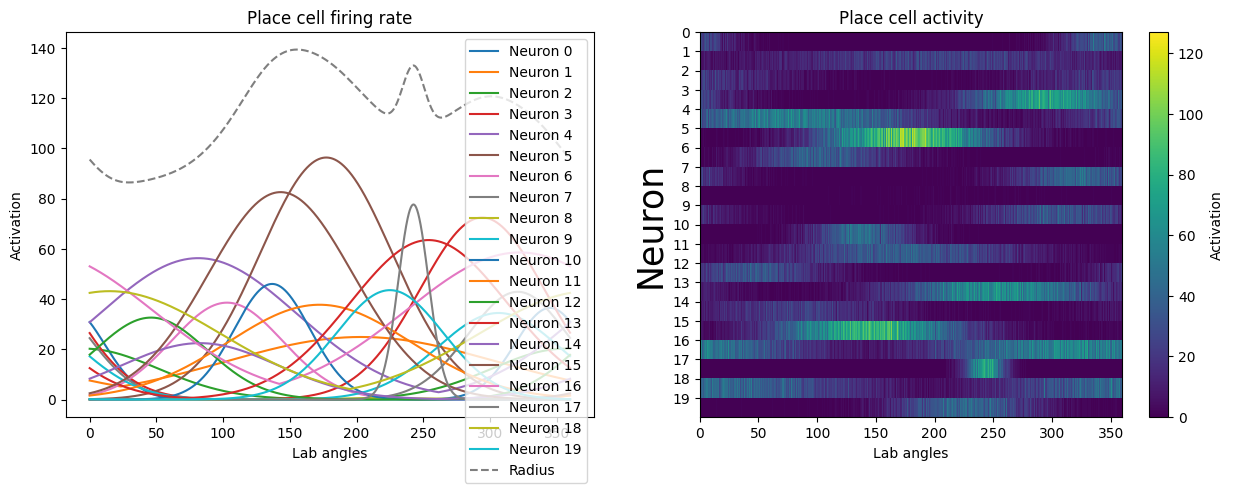

In [486]:
firing_rates, radius, place_cell_activity, angles = create_bumps_array(
    positions, widths, num_angles=2000, equal_peaks=equal_peaks
)

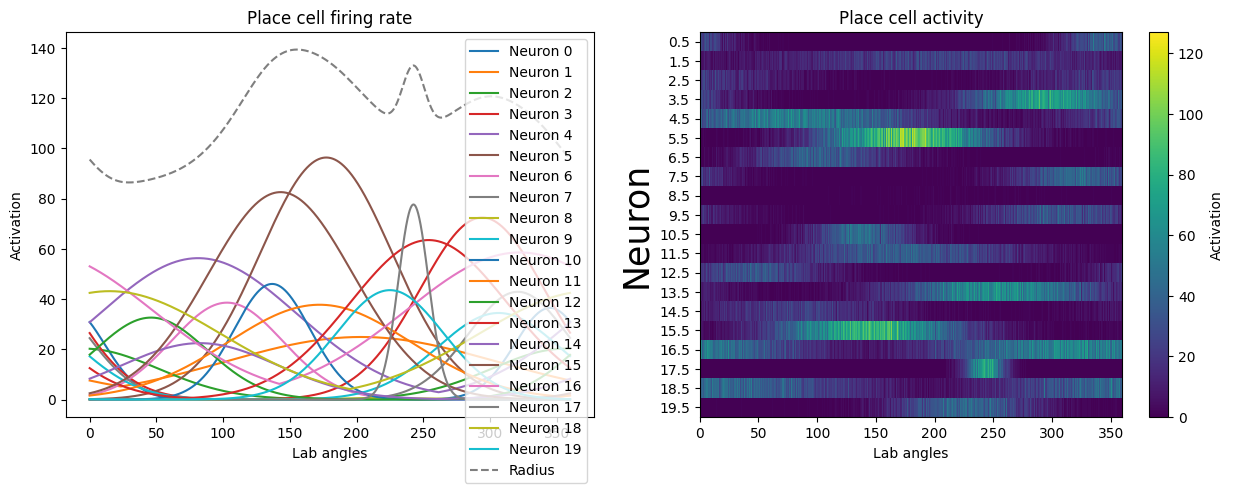

In [490]:
fig = plot_bumps_array(firing_rates, radius, place_cell_activity, angles)

**Choose neurons to project OR choose random projection**

In [491]:
# neuron_x_id, neuron_y_id, neuron_z_id = 0, 1, 2

neuron_x_id, neuron_y_id, neuron_z_id = np.random.choice(
    len(positions), 3, replace=False
)

In [492]:
x = place_cell_activity[:, neuron_x_id]
y = place_cell_activity[:, neuron_y_id]
z = place_cell_activity[:, neuron_z_id]

r = np.sqrt(x**2 + y**2 + z**2)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x,
            y=y,
            z=z,
            mode="markers",
            marker=dict(
                size=3,
                color=angles,  # set color to an array/list of desired values
                colorscale="hsv",  # choose a colorscale
                opacity=0.5,
            ),
        )
    ]
)

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    scene=dict(
        xaxis_title=f"neuron {neuron_x_id}",
        yaxis_title=f"neuron {neuron_y_id}",
        zaxis_title=f"neuron {neuron_z_id}",
    ),
    title=f"3D Projection of activity for neurons {neuron_x_id}, {neuron_y_id}, {neuron_z_id}",
)

fig.show()

In [493]:
diagrams = persistent_homology.compute_persistence_diagrams(
    place_cell_activity, maxdim=1
)

'compute_persistence_diagrams' executed in 12.0359s


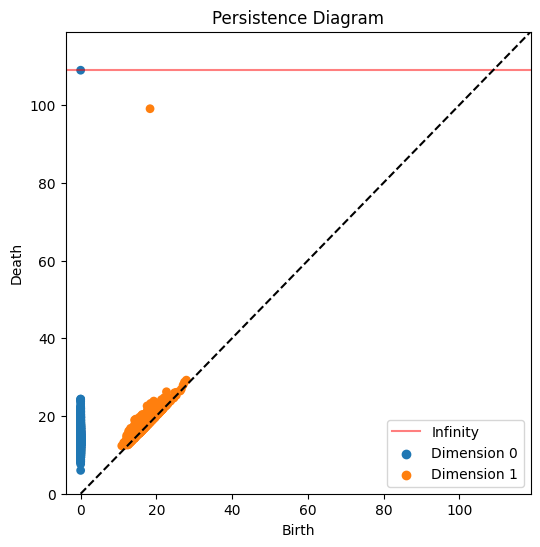

In [494]:
viz.plot_persistence_diagrams(diagrams)

**Try: delete certain cells**

Seems like deleting a few cells can leave a gap and really affect PH performance!

In [123]:
delete_place_cell_activity = np.delete(
    place_cell_activity,
    [
        5,
    ],
    axis=1,
)
plt.imshow(
    delete_place_cell_activity.T, cmap="viridis", aspect="auto", interpolation="none"
)

In [176]:
delete_diagrams = persistent_homology.compute_persistence_diagrams(
    delete_place_cell_activity, maxdim=1
)

NameError: name 'delete_place_cell_activity' is not defined

In [166]:
viz.plot_persistence_diagrams(delete_diagrams)

NameError: name 'delete_diagrams' is not defined

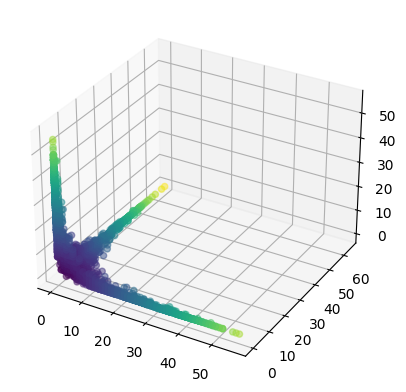

In [263]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")


neuron_x_id = 0
neuron_y_id = 1
neuron_z_id = 2


x = place_cell_activity[:, neuron_x_id]
y = place_cell_activity[:, neuron_y_id]
z = place_cell_activity[:, neuron_z_id]

r = np.sqrt(x**2 + y**2 + z**2)

ax.scatter(x, y, z, alpha=0.5, c=r, cmap="viridis");